In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/autompg/auto-mpg.csv


In [2]:
print(os.listdir('/kaggle/input/autompg/'))

['auto-mpg.csv']


# **Ridge Regression Closed Form**

In [3]:
df = pd.read_csv('/kaggle/input/autompg/auto-mpg.csv')

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
df.shape

(398, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [7]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [8]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [9]:
df['car name'].nunique()

305

In [10]:
df[df['horsepower'].str.isnumeric()] # data points where the horsepower feature is numeric

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [11]:
df[df['horsepower'].str.isnumeric() == False] # data points where the horsepower feature is not numeric

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [12]:
df['horsepower'] = df['horsepower'].replace('?', np.nan)

Recheck for the ? values in the horsepower column

In [13]:
df[df['horsepower'].str.isnumeric() == False] # data points where the horsepower feature is not numeric -> outputs no column

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


#### **Convert the object types to int**

In [15]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [17]:
df['horsepower'].isna().sum()

6

In [18]:
for entry in df['car name']:
    print(f"entry old : {entry}")
    entry = entry.split()[0] # based on the first name -> which is the company.
    print(f"entry transformed : {entry}")
    print("----")

entry old : chevrolet chevelle malibu
entry transformed : chevrolet
----
entry old : buick skylark 320
entry transformed : buick
----
entry old : plymouth satellite
entry transformed : plymouth
----
entry old : amc rebel sst
entry transformed : amc
----
entry old : ford torino
entry transformed : ford
----
entry old : ford galaxie 500
entry transformed : ford
----
entry old : chevrolet impala
entry transformed : chevrolet
----
entry old : plymouth fury iii
entry transformed : plymouth
----
entry old : pontiac catalina
entry transformed : pontiac
----
entry old : amc ambassador dpl
entry transformed : amc
----
entry old : dodge challenger se
entry transformed : dodge
----
entry old : plymouth 'cuda 340
entry transformed : plymouth
----
entry old : chevrolet monte carlo
entry transformed : chevrolet
----
entry old : buick estate wagon (sw)
entry transformed : buick
----
entry old : toyota corona mark ii
entry transformed : toyota
----
entry old : plymouth duster
entry transformed : plymo

In [19]:
df['Brand'] = df['car name'].str.split().str[0]

In [20]:
df = df.drop(columns=['car name'])

In [21]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Brand
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford


#### Apply target mean encoding on the car name column

In [22]:
g_mean = df['mpg'].mean()

In [23]:
brand_means = df.groupby('Brand')['mpg'].mean()

In [24]:
brand_means

Brand
amc              18.246429
audi             26.714286
bmw              23.750000
buick            19.182353
cadillac         19.750000
capri            25.000000
chevroelt        16.000000
chevrolet        20.472093
chevy            18.000000
chrysler         17.266667
datsun           31.113043
dodge            22.060714
fiat             28.912500
ford             19.694118
hi                9.000000
honda            33.761538
maxda            26.050000
mazda            30.860000
mercedes         25.400000
mercedes-benz    23.250000
mercury          19.118182
nissan           36.000000
oldsmobile       21.100000
opel             25.750000
peugeot          23.687500
plymouth         21.703226
pontiac          20.012500
renault          32.880000
saab             23.900000
subaru           30.525000
toyota           28.372000
toyouta          23.000000
triumph          35.000000
vokswagen        29.800000
volkswagen       29.106667
volvo            21.116667
vw               39.01

## Map the brand means to a new encoded column, fill missing with the global mean


In [25]:
df['Brand_encoded'] = df['Brand'].map(brand_means).fillna(g_mean)

In [26]:
df = df.drop(columns=['Brand'])

In [27]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Brand_encoded
0,18.0,8,307.0,130.0,3504,12.0,70,1,20.472093
1,15.0,8,350.0,165.0,3693,11.5,70,1,19.182353
2,18.0,8,318.0,150.0,3436,11.0,70,1,21.703226
3,16.0,8,304.0,150.0,3433,12.0,70,1,18.246429
4,17.0,8,302.0,140.0,3449,10.5,70,1,19.694118


In [28]:
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean()) # fill the nan values with the mean

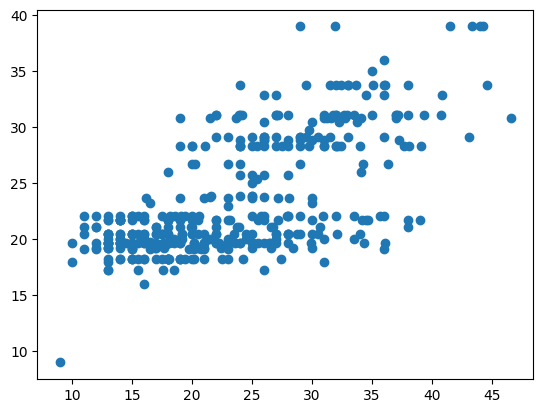

In [29]:
import matplotlib.pyplot as plt

plt.scatter(df['mpg'], df['Brand_encoded'])

## Split the data

In [30]:
from sklearn.model_selection import train_test_split

y = df['mpg']
X = df.drop(columns=['mpg']) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
X_test

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Brand_encoded
198,4,91.0,53.0,1795,17.4,76,3,33.761538
396,4,120.0,79.0,2625,18.6,82,1,19.694118
33,6,232.0,100.0,2634,13.0,71,1,18.246429
208,8,318.0,150.0,3940,13.2,76,1,21.703226
93,8,318.0,150.0,4237,14.5,73,1,21.703226
...,...,...,...,...,...,...,...,...
249,8,260.0,110.0,3365,15.5,78,1,21.100000
225,6,250.0,110.0,3520,16.4,77,1,20.472093
367,4,112.0,88.0,2605,19.6,82,1,20.472093
175,4,90.0,70.0,1937,14.0,75,2,29.106667


## Scaling the data

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # generate scaling parameters and then fit the data points within that scale
X_test = scaler.transform(X_test) # use the same generated scaling parameters and fit the training set (DONT USE fit_transform)

In [33]:
df.isna().sum()

mpg              0
cylinders        0
displacement     0
horsepower       0
weight           0
acceleration     0
model year       0
origin           0
Brand_encoded    0
dtype: int64

# Checking distribution plots

/tmp/ipykernel_17/3665838198.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[i],kde=True)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_17/3665838198.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a gu

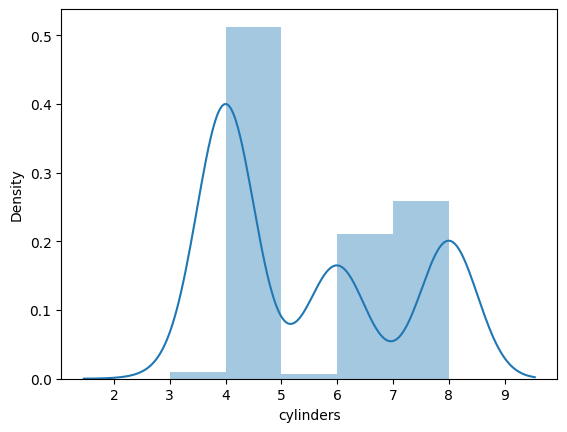

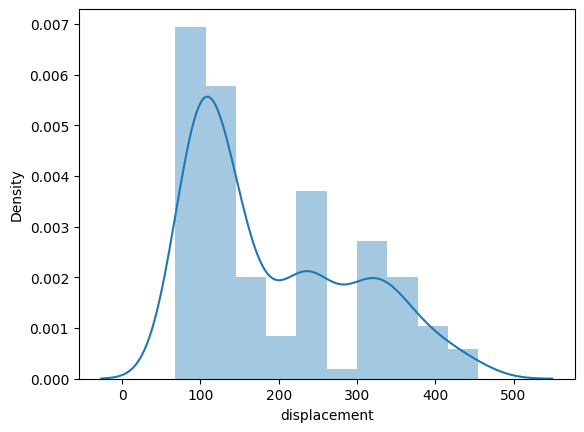

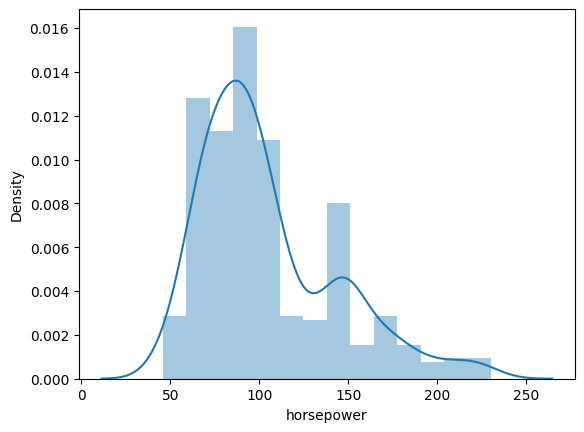

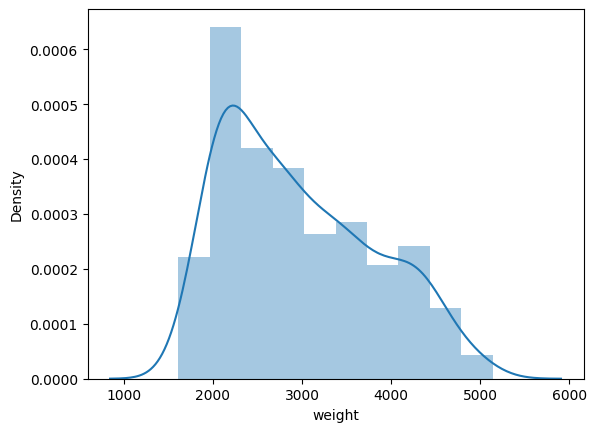

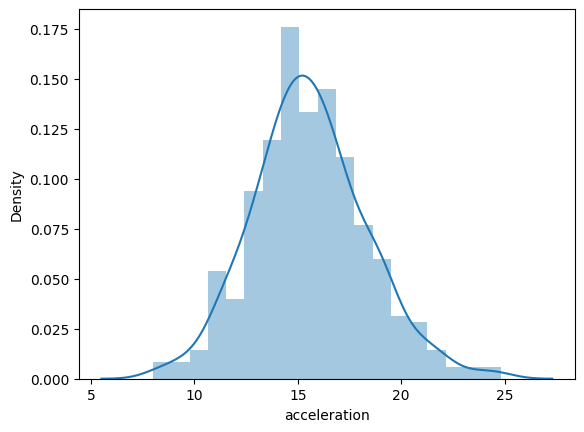

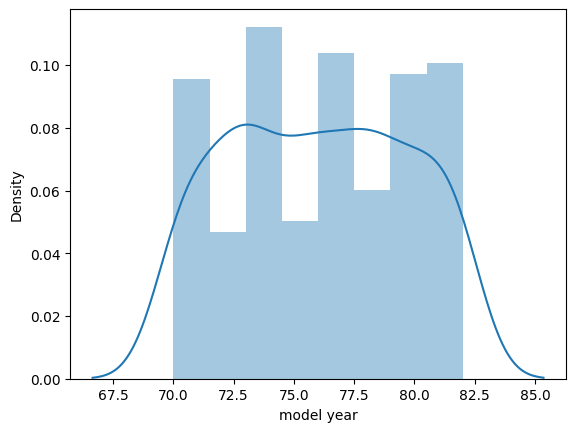

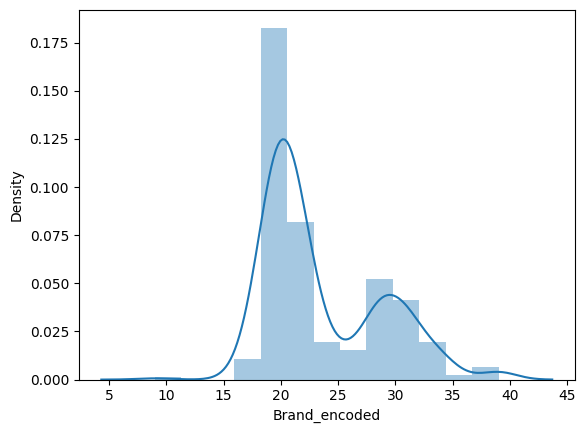

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

cols =['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'Brand_encoded']
for i in cols:
    plt.figure()
    sns.distplot(X[i],kde=True)

In [35]:
#### Training Ridge regression model
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1, solver='cholesky')

In [36]:
ridge_reg.fit(X_train, y_train)

Ridge(alpha=0.1, solver='cholesky')

In [37]:
ridge_reg.coef_

array([-0.54219306,  1.36911949, -0.27897732, -5.08039158,  0.3419396 ,
        2.76050514, -0.63981818,  2.24380846])

In [38]:
print(X_test)

[[-0.85051483 -0.98134964 -1.35927363 -1.39881183  0.63795339 -0.02884597
   1.73836775  1.94882223]
 [-0.85051483 -0.69930815 -0.65670857 -0.40988656  1.07290607  1.63897537
  -0.72949361 -0.75818383]
 [ 0.33833667  0.38995555 -0.08925218 -0.39916327 -0.9568731  -1.41869708
  -0.72949361 -1.0367639 ]
 [ 1.52718818  1.22635446  1.26183446  1.15690469 -0.88438099 -0.02884597
  -0.72949361 -0.37156939]
 [ 1.52718818  1.22635446  1.26183446  1.51077313 -0.41318225 -0.86275663
  -0.72949361 -0.37156939]
 [-0.85051483 -0.92299623 -0.41351298 -1.03541158  0.31173888 -1.14072686
   1.73836775  0.91170864]
 [-0.85051483 -0.50479678 -0.30542605 -0.12393226  0.27549283  1.63897537
  -0.72949361 -0.75818383]
 [ 1.52718818  2.41287384  3.01824709  2.10412829 -1.68179423 -0.86275663
  -0.72949361 -1.22530034]
 [ 1.52718818  0.66227147  0.18096514  1.29988184  1.2178903   0.24912426
  -0.72949361 -0.48764866]
 [ 0.33833667  0.07873735  0.03151842 -0.1120175   0.49296917 -0.58478641
  -0.72949361 -0.

In [39]:
y_pred = ridge_reg.predict(X_test)

In [40]:
print(len(y_pred))
y_pred

80


array([33.61050939, 29.03426692, 19.90836339, 17.48059744, 13.54191402,
       26.07235803, 27.47714941,  9.31252758, 17.50918694, 21.41261675,
       12.00344323, 36.78250716, 25.43383909, 12.93605317, 23.83204625,
        8.08295306, 29.02518619, 21.63377889, 16.42847246, 35.81412537,
       25.28715309, 19.3238297 , 27.87771383, 28.89093037, 14.83974364,
       40.22506484, 26.73809014, 24.66162258, 21.0381806 ,  9.34069263,
       27.87721586, 35.64215888, 20.31648136, 25.03123319, 33.89941288,
       12.43281002, 21.8459362 , 21.46566941, 13.49671419, 27.01144216,
       25.96858648, 28.54279178, 18.57763785,  8.09159438, 21.2857916 ,
       36.73452955, 27.78728422, 23.52080915, 21.89601968, 28.77148291,
       22.61165039, 31.06357552, 33.70378626, 10.28158232, 27.08132773,
       10.43473874, 18.40146504, 28.86623524, 22.91382548, 20.97309375,
       16.5160711 , 32.85556512, 23.61600713, 20.20406545, 21.25803942,
       24.38064382, 25.42332408, 31.29290784, 27.84073865, 13.02

In [41]:
y_test

198    33.0
396    28.0
33     19.0
208    13.0
93     14.0
       ... 
249    19.9
225    17.5
367    28.0
175    29.0
285    17.0
Name: mpg, Length: 80, dtype: float64

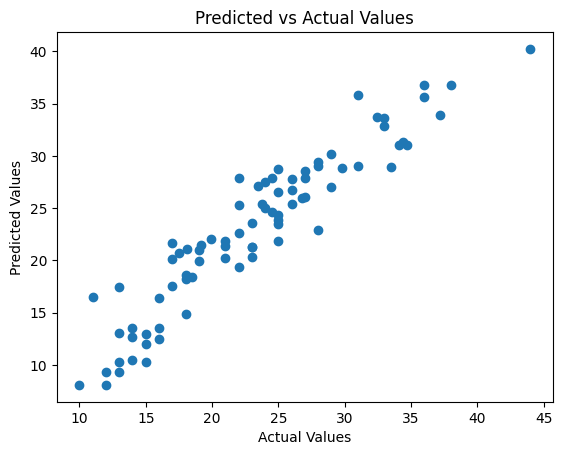

In [42]:
import matplotlib.pyplot as plt

# Plot predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.show()


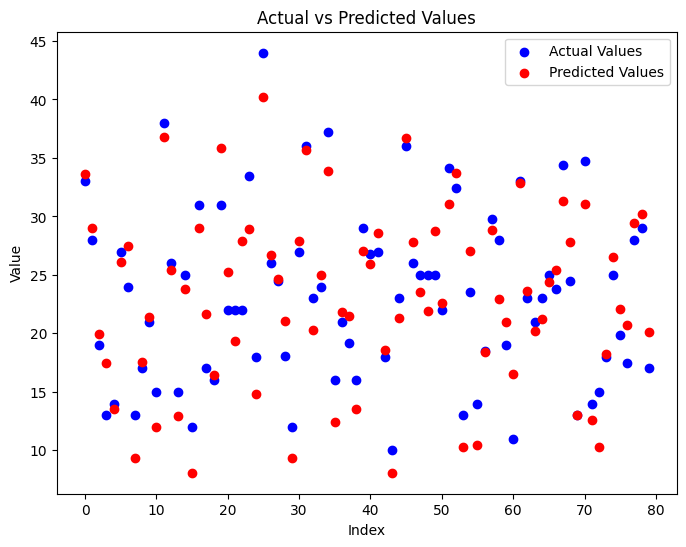

In [43]:
plt.figure(figsize=(8, 6))

# Scatter plot for actual values (you can choose any color you like)
plt.scatter(np.arange(len(y_test)), y_test, color='blue', label='Actual Values')

# Scatter plot for predicted values (you can choose any color you like)
plt.scatter(np.arange(len(y_pred)), y_pred, color='red', label='Predicted Values')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')

# Add a legend
plt.legend()

# Show the plot
plt.show()

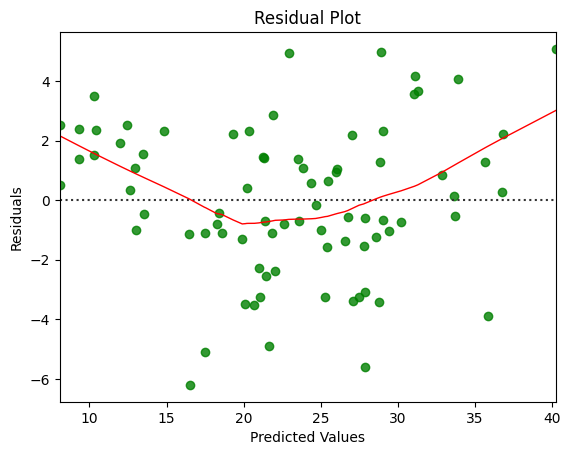

In [44]:
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred

# Residual plot
sns.residplot(x=y_pred, y=residuals, lowess=True, color='g', line_kws={'color': 'r', 'lw': 1})
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [45]:
from sklearn.metrics import mean_squared_error, r2_score

# Example after predicting with the model
y_pred = ridge_reg.predict(X_test)

# R-squared score
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


R² Score: 0.8759476386559408
Mean Squared Error: 6.6698543082600334
